In [1]:
from Model import RetrainedClassificationModel
from HyperparameterOptimization import findOptimalBatchSize
model = RetrainedClassificationModel('noname')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\projects\machine learning\Airbus-Ship-Detection-Challenge\Model\RetrainedClassificationModel.py:33: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fl...)`
  self.model = Model(input=model.input, output=predictions)


In [2]:
bs = findOptimalBatchSize(model, 64)

Testing batch size 64
Epoch 1/1
ResourceExhaustedError
Testing batch size 32
Epoch 1/1
11/11 [==============================] - 18s 2s/step - loss: 2630.2515 - val_loss: 2449.0942
Testing batch size 16
Epoch 1/1
22/22 [==============================] - 14s 625ms/step - loss: 2628.2212 - val_loss: 2449.0928
Testing batch size 8
Epoch 1/1
44/44 [==============================] - 15s 331ms/step - loss: 2629.9111 - val_loss: 2449.0899


In [3]:
model.reset()
hst = model.train(bs, n_epoch=100000, reduced_size=1000)

D:\projects\machine learning\Airbus-Ship-Detection-Challenge\Model\RetrainedClassificationModel.py:33: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fl...)`
  self.model = Model(input=model.input, output=predictions)


Epoch 1/100000
44/44 [==============================] - 29s 666ms/step - loss: 3397.1466 - val_loss: 4316.5223
Epoch 2/100000
44/44 [==============================] - 17s 389ms/step - loss: 3754.9242 - val_loss: 4377.9428
Epoch 3/100000
44/44 [==============================] - 17s 390ms/step - loss: 3767.3853 - val_loss: 4378.6728
Epoch 4/100000
44/44 [==============================] - 17s 390ms/step - loss: 3768.2998 - val_loss: 4379.5520
Epoch 5/100000
44/44 [==============================] - 17s 392ms/step - loss: 3768.4149 - val_loss: 4379.5518
Epoch 6/100000
44/44 [==============================] - 17s 393ms/step - loss: 3768.4148 - val_loss: 4379.5518
Epoch 7/100000
44/44 [==============================] - 17s 392ms/step - loss: 3768.4148 - val_loss: 4379.5518
Epoch 8/100000
44/44 [==============================] - 17s 391ms/step - loss: 3768.4148 - val_loss: 4379.5518
Epoch 9/100000
44/44 [==============================] - 17s 392ms/step - loss: 3768.4148 - val_loss: 4379.5518
E

In [4]:
# model.load('tcm.263-0.09.hdf5')

In [4]:
from getABSDData import getABSDDataMask
import cv2
import keras
label_converter = lambda x: cv2.resize(x, (model.img_width, model.img_width))
image_converter = lambda x: keras.applications.vgg16.preprocess_input(label_converter(x))
training, dev, _ = getABSDDataMask(1, label_converter=label_converter, image_converter=image_converter, remove_nan=True)

In [10]:
i, m = training[100]

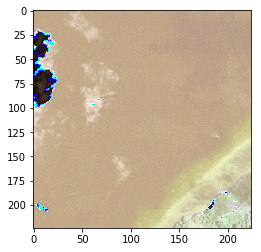

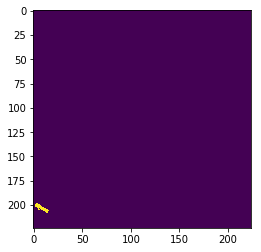

In [11]:
import matplotlib .pyplot as plt
import numpy as np
plt.imshow(i[0, :, :, :].astype(np.uint8))
plt.show()
plt.imshow(m.reshape((224, 224)))
plt.show()

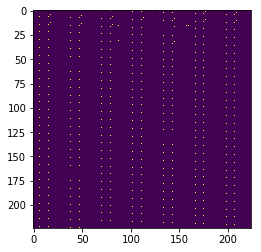

In [12]:
p = model.model.predict(i)
plt.imshow(p.reshape((224, 224)))
plt.show()

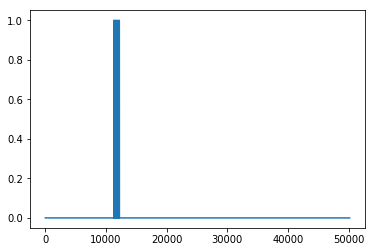

In [8]:
plt.plot(m.flatten())
plt.show()

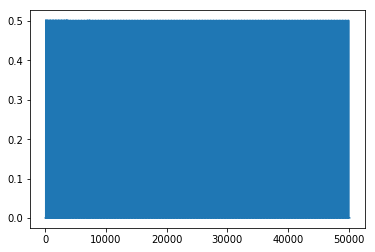

In [9]:
plt.plot(p[0, :])
plt.show()